In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint

import src.io as sio
import src.preprocessing as spp
import src.fitting as sft

In [2]:
AFM_FOLDER = "20200818_Akiyama_AFM/"
AFM_FOLDER1 = "20200721_Akiyama_AFM/"

## 20200721_Akiyama_AFM

In [3]:
params, data = sio.read_dat(AFM_FOLDER1 + "frq-sweep002.dat")
freq_shift = data["Frequency Shift (Hz)"].values
amplitude = data["Amplitude (m)"].values
phase = data["Phase (deg)"].values
amp_freq_sweep = sft.fit_lorentzian(freq_shift, amplitude, linear_offset=True)
phase_freq_sweep = sft.fit_fano(freq_shift, phase)

Text(0.5, 0, 'Frequency Shift (Hz)')

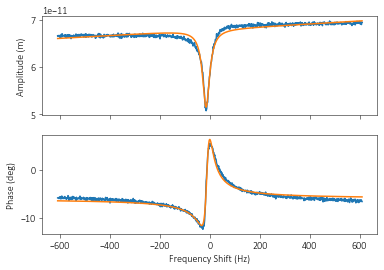

In [4]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
ax1.plot(freq_shift, amplitude)
ax1.plot(freq_shift, amp_freq_sweep.best_fit)
ax1.set_ylabel(data.columns[2])

ax2.plot(freq_shift, phase)
ax2.plot(freq_shift, phase_freq_sweep.best_fit)
ax2.set_ylabel(data.columns[3])
ax2.set_xlabel(data.columns[0])

Quality factor can be calculated as $ Q = \frac{f_R}{\Delta f} $

In [5]:
print(f'Q-factor= {params["f_res (Hz)"] / amp_freq_sweep.params["fwhm"].value}')

Q-factor= 1324.7865507193228


## 20200818_Akiyama_AFM

In [12]:
params, data = sio.read_dat(AFM_FOLDER + "frq-sweep001.dat")
#pprint(params, sort_dicts=False)
freq_shift = data["Frequency Shift (Hz)"]
amplitude = data["Amplitude (m)"]
phase = data["Phase (deg)"]
fano = sft.fit_fano(freq_shift, amplitude)
lorentzian = sft.fit_fano(freq_shift, phase)

## Equations for calculating Q factor

$$ Q = \frac{f_R}{\Delta f} $$

$$ Q = \frac{A(\omega_0)}{A_{in}} $$

In [13]:
f_res = 44379.7064
sigma = 62.2841355
print(f_res/sigma)

A_drive = 50e-3
A_res = 28.3e-6 * 1 / 500e-6
print(A_res/A_drive)

# Calibration
A_drive = 50e-3
osc_amp = 50e-9

print(osc_amp/A_drive)

712.5362830154398
1.132
1e-06


## Plot frequency sweep curves

In [14]:
%matplotlib widget
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
ax1.plot(freq_shift, amplitude)
ax1.plot(freq_shift, fano.best_fit)
ax1.set_ylabel(data.columns[2])

ax2.plot(freq_shift, phase)
ax2.plot(freq_shift, lorentzian.best_fit)
ax2.set_ylabel(data.columns[3])
ax2.set_xlabel(data.columns[1])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 0, 'Center Frequency (Hz)')

## Extract fit values

In [ ]:
print("{} = {:.1f} +- {:.1f}".format(fano.params["sigma"].name, fano.params["sigma"].value, fano.params["sigma"].stderr))
print("{} = {:.2e} +- {:.0e}".format(fano.params["amplitude"].name, fano.params["amplitude"].value, fano.params["amplitude"].stderr))

## Print fit reports

In [ ]:
fano

In [ ]:
lorentzian